In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [193]:
df = pd.read_csv('pima-indians-diabetes.csv')

In [194]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetespedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [195]:
x = df.drop(['SkinThickness','Outcome'],axis=1)
y = df['Outcome']

In [196]:
x

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetespedigreeFunction,Age
0,6,148,72,0,33.6,0.627,50
1,1,85,66,0,26.6,0.351,31
2,8,183,64,0,23.3,0.672,32
3,1,89,66,94,28.1,0.167,21
4,0,137,40,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63
764,2,122,70,0,36.8,0.340,27
765,5,121,72,112,26.2,0.245,30
766,1,126,60,0,30.1,0.349,47


In [197]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [198]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=16)

In [199]:
x_train.shape,y_train.shape

((576, 7), (576,))

In [200]:
x_test.shape,y_test.shape

((192, 7), (192,))

In [201]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(x_train,y_train)

x:\Machine Learning SCOE\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [202]:
y_train_pred = logreg.predict(x_train)
y_test_pred = logreg.predict(x_test)

In [203]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
print(f'Train Accuracy: ',accuracy_score(y_train,y_train_pred))
print(f'Test Accuracy: ',accuracy_score(y_test,y_test_pred))

print(f'Train: \n',classification_report(y_train,y_train_pred))
print(f'Test: \n',classification_report(y_test,y_test_pred))

# names = ['without diabetes', 'with diabetes']
# print('Train: \n',confusion_matrix(y_train,y_train_pred,target_names=names))
# print('Test: \n',confusion_matrix(y_test,y_test_pred,target_names=names))

print('Train: \n',confusion_matrix(y_train,y_train_pred))
print('Test: \n',confusion_matrix(y_test,y_test_pred))

Train Accuracy:  0.7708333333333334
Test Accuracy:  0.8177083333333334
Train: 
               precision    recall  f1-score   support

           0       0.79      0.89      0.83       375
           1       0.73      0.55      0.63       201

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.76       576

Test: 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       125
           1       0.81      0.63      0.71        67

    accuracy                           0.82       192
   macro avg       0.81      0.77      0.79       192
weighted avg       0.82      0.82      0.81       192

Train: 
 [[333  42]
 [ 90 111]]
Test: 
 [[115  10]
 [ 25  42]]


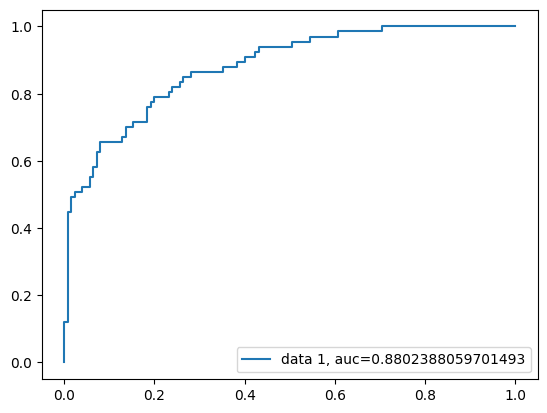

In [204]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()